## EDA : Data structure, distributions, outliers, trends

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno # to visualise missing patterns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
df= pd.read_csv("/Users/essalehachraf/Desktop/Spotify-sHits-Unsupervised_Learning_Challenge/data /raw/playlist_2010to2022.csv")

df.head()


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [4]:
print("data_set_shape :", df.shape)

df.info

print("number of misssing value per column :\n", df.isnull().sum())


print("number of duplicated rows:\n",df.duplicated().sum())

df.describe()


data_set_shape : (2300, 23)
number of misssing value per column :
 playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64
number of duplicated rows:
 0


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


- We have a dataset with a reasonable size for EDA (2300,23) -> not to small to be irrelevent and not to big to be hard to visualize 
- We can see that 13/23 columns have only one  missing value ( which is an extremly low percentage ) but we have to see the localisation of those missing value in our dataset in order to try to  determine the reason behind it.( we can have only one row with 13 missing features out of 23 features -> meaning dropping only one feature OR  we can have 13 rows each with only one missing feature out of 23 -> meaning dropping 13 row)
- We have no supplicates songs . we don't need to delete some rows 
- from the description table : we ca see that most of the songs are somewhat popular and they are quite danceable 



In [5]:
rows_with_missing_data= df[df.isnull().any(axis=1)]
rows_with_missing_data



,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
447,https://open.spotify.com/playlist/37i9dQZF1DWT...,2004,6MFQeWtk7kxWGydnJB2y36,These Words,68,Unwritten,7o95ZoZt5ZYn31e9z1Hc0a,Natasha Bedingfield,"['dance pop', 'pop', 'post-teen pop']",64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum(axis=1).value_counts()


0     2299
13       1
Name: count, dtype: int64

- Now we are sure that only one row only has 13 missing features --> so we can drop it as it represents one sample out of 2300 . wich is negligeable 

<Axes: >

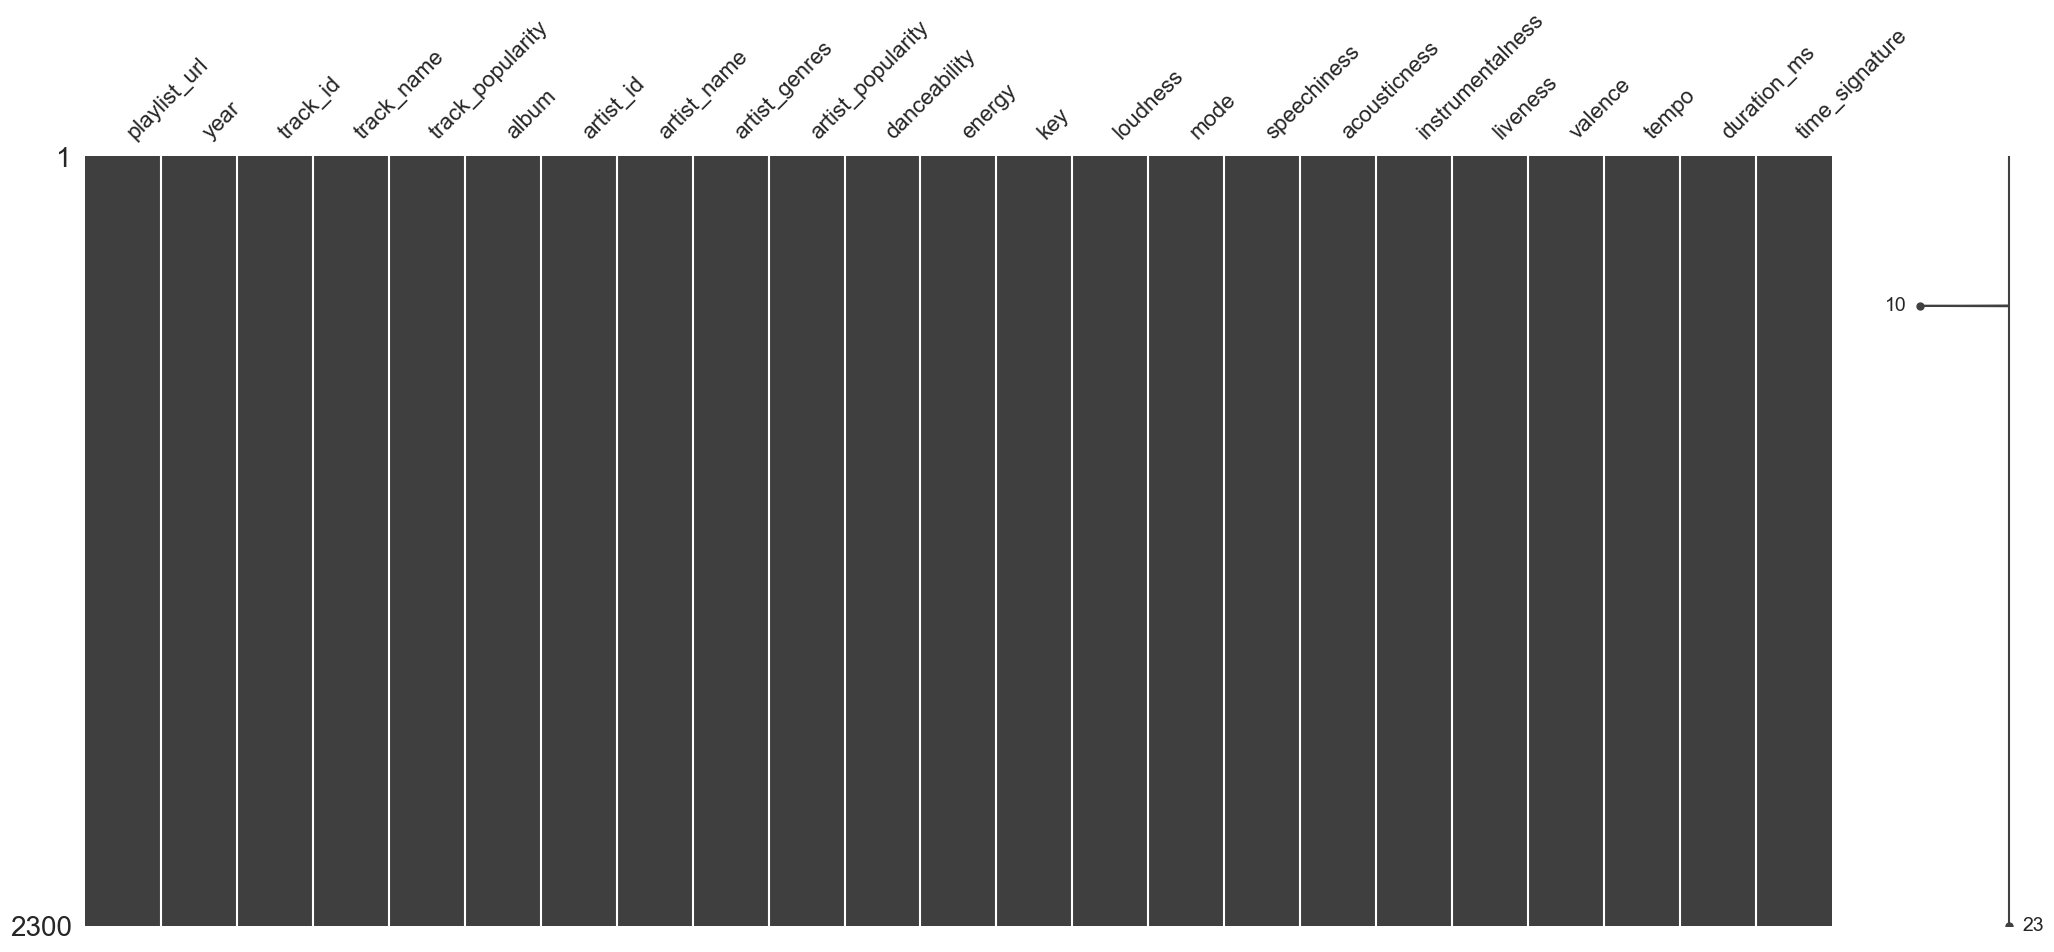

In [7]:
# if we wanna visualise it instead we can use  missingno to confirm randomness
msno.matrix(df)


- The line in the right shows that only 10 features are not missing out of 23 features in one row 

In [18]:
df = df.dropna()
df.shape



(2299, 23)

- ok one row is dropped 


In [9]:
df.dtypes


playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

- We have to treat numerocal and categorical features diffrently , we are going to split the features in two groups 

In [17]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
cat_fetures=df.select_dtypes(exclude=['float64', 'int64']).columns
num_features,cat_fetures

(Index(['year', 'track_popularity', 'artist_popularity', 'danceability',
        'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
        'time_signature'],
       dtype='object'),
 Index(['playlist_url', 'track_id', 'track_name', 'album', 'artist_id',
        'artist_name', 'artist_genres'],
       dtype='object'))

- in order to well understand the data set we should explore each one of them separatly 

In [11]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
year,2299.0,2011.003045,6.634528,2000.000000,2005.00000,2011.0000,2017.000000,2022.000
track_popularity,2299.0,70.944759,12.294047,0.000000,66.00000,72.0000,79.000000,100.000
artist_popularity,2299.0,72.873423,12.180506,29.000000,65.00000,74.0000,82.000000,100.000
danceability,2299.0,0.660116,0.141137,0.162000,0.57200,0.6710,0.759500,0.975
energy,2299.0,0.693047,0.164838,0.051900,0.58600,0.7120,0.820000,0.999
key,2299.0,5.277947,3.628494,0.000000,2.00000,5.0000,8.000000,11.000
loudness,2299.0,-5.784040,2.080853,-21.107000,-6.82350,-5.5110,-4.364500,-0.276
mode,2299.0,0.598521,0.490304,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,2299.0,0.097795,0.092445,0.022500,0.03800,0.0568,0.115500,0.576
acousticness,2299.0,0.157689,0.203844,0.000013,0.01650,0.0689,0.223000,0.978


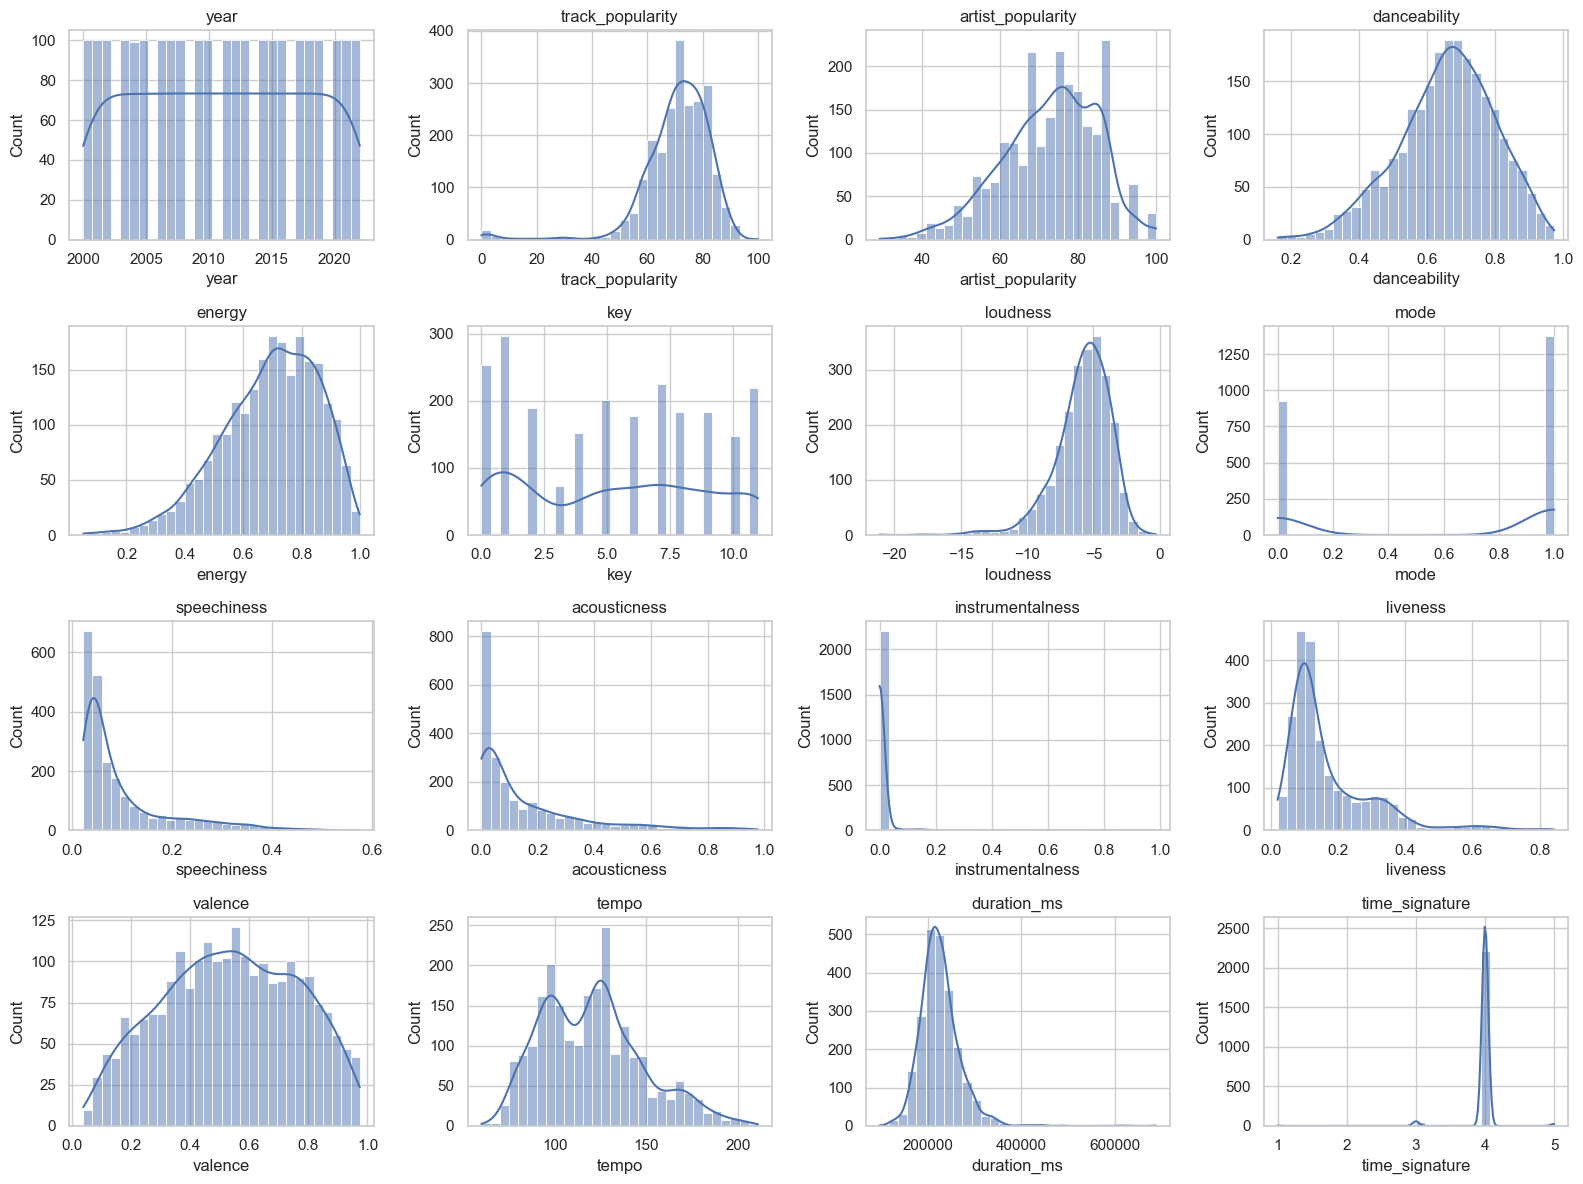

In [19]:
#destribution for each numerical feature 
plt.figure(figsize=(16,12))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True) #kde := estimation de al densité de chaque noyau (kernel density Estimatio) 
    plt.title(col)
plt.tight_layout()
plt.show()

- danceability, energy and valence  show normal distributions centered around mid range values , suggesting that hit songs tend to balance these traits.
- speechiness, acousticness , instrumentalness, liveness  are  right-skewed 
- track_popularity , artist_popularity  are right skewed  
- Loudness is left-skewed  with most songs being moderately loud 

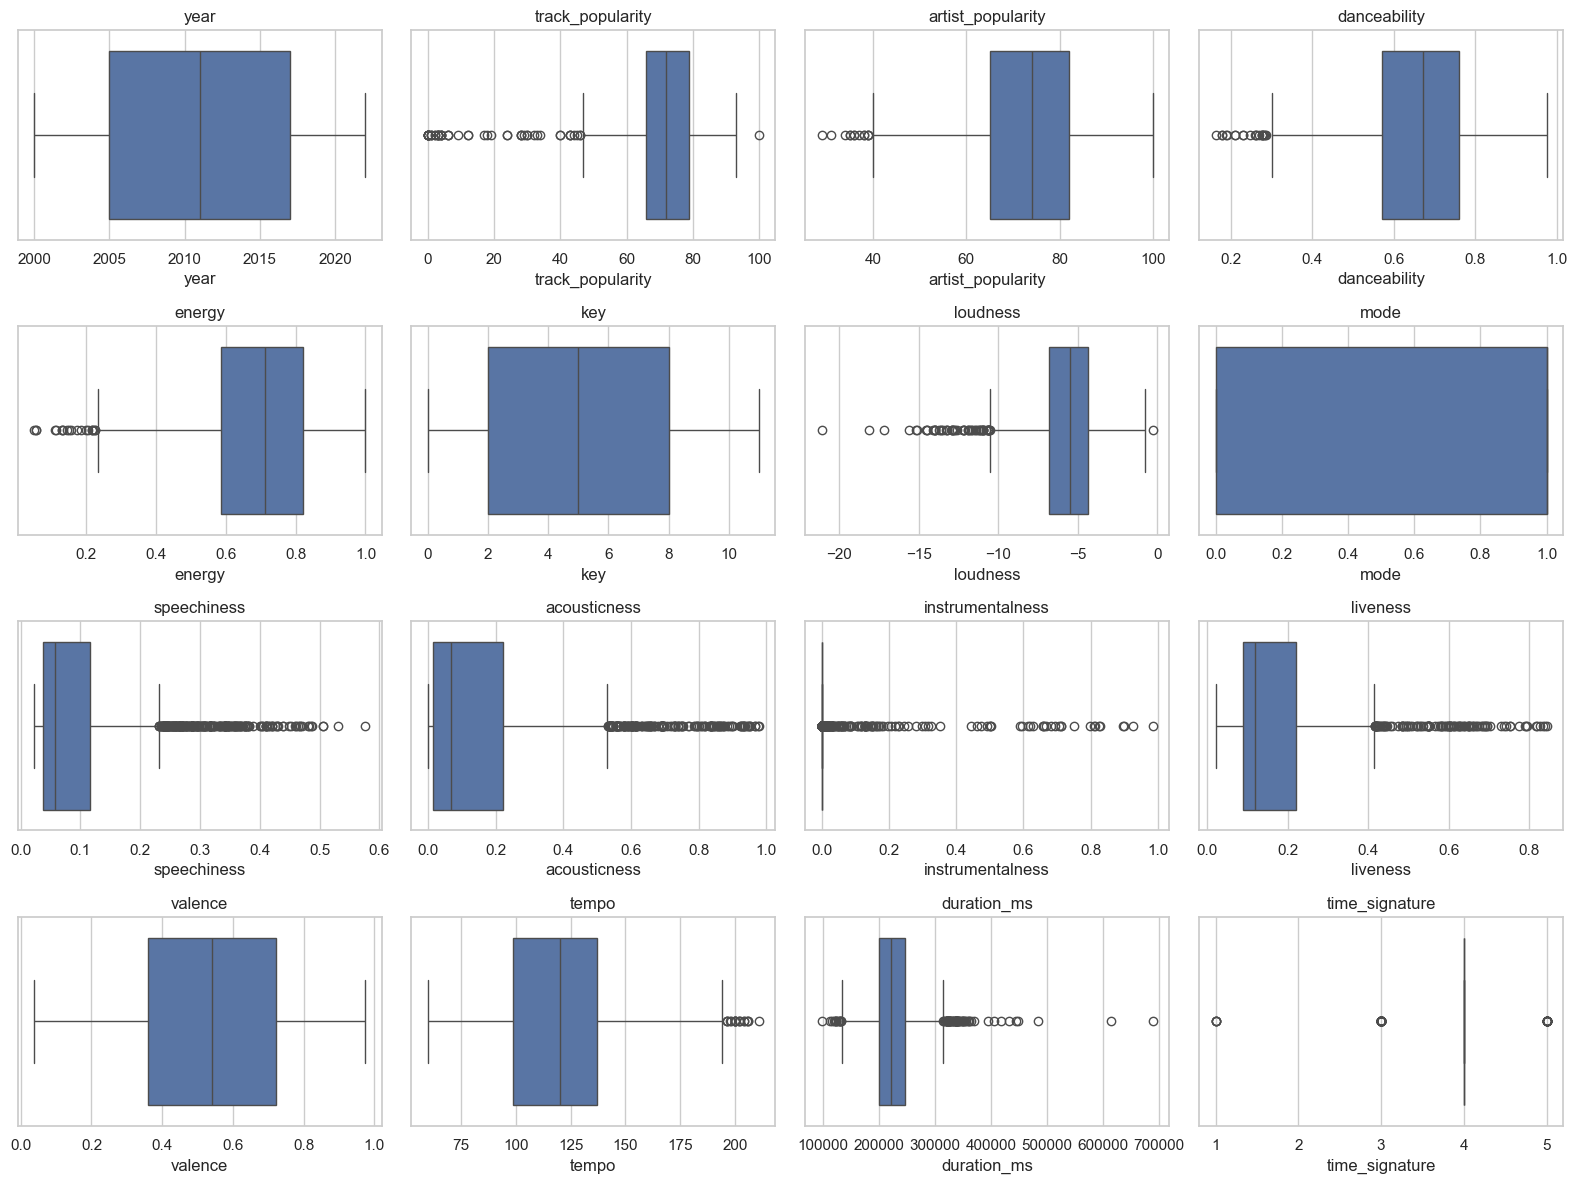

In [13]:
plt.figure(figsize=(16,12))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

- Severale features contain long tail outliers especially instrumentlaness , acousticness , speechiness  liveness , and duration_ms
- We suppose those  outliers represents diversity in musics not erros . 
- track_popularity and artist popularity include some outliers but are in the expected limits 
-  most etxreme values seem legitimate music variation and not noise

In [14]:
for col in cat_fetures:
    print(f"{col}: {df[col].nunique()} unique values")


playlist_url: 23 unique values
track_id: 2201 unique values
track_name: 2120 unique values
album: 1663 unique values
artist_id: 891 unique values
artist_name: 891 unique values
artist_genres: 698 unique values


- this output gives us valuable informations : 
  - we can see  that we only have 23 unique values and 23 is card([2000,2022]) woch means songs are grouped by 23 diffrent playlists (2000/2001....2022)
  - track-id and track-name  -> almost every row corresponds to a unique song -> (good data integrity)
  - album (1663) --> some songs share albums wich is normmal
  - 891 artist : wich suggest diversity , but also suggest that genre or the popularity of the artist could be intresting grouping feature
  - since artists genres feature is very high (698 )  we may group by genre 

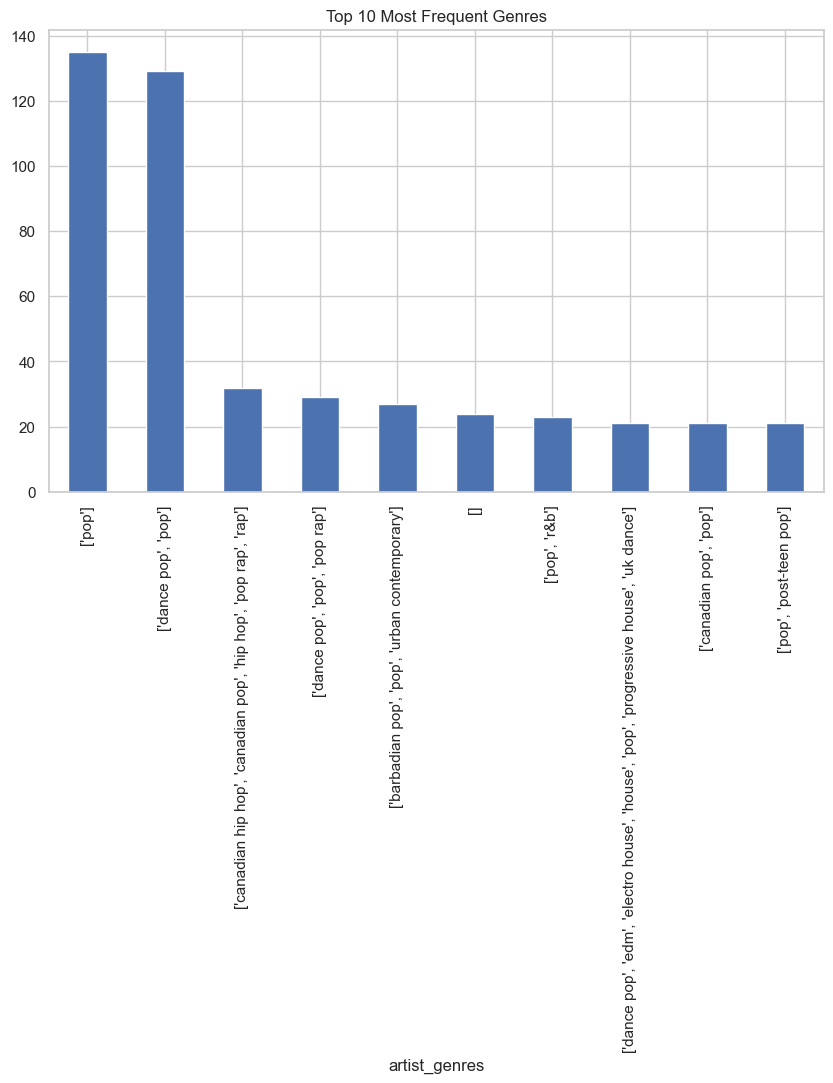

In [15]:
plt.figure(figsize=(10,6))
df['artist_genres'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Genres")
plt.show()

- We can clearly see that [pop] and [dancepop , pop] are the most frequent genres , as they are above 120 . Moreover the other 8 genres don't cross 40 
- That means that the data is imbalenced by genre ( wich may biais our model ), we mignt need to groupe those genres that have many in the list but few samples to get meaninful insights  

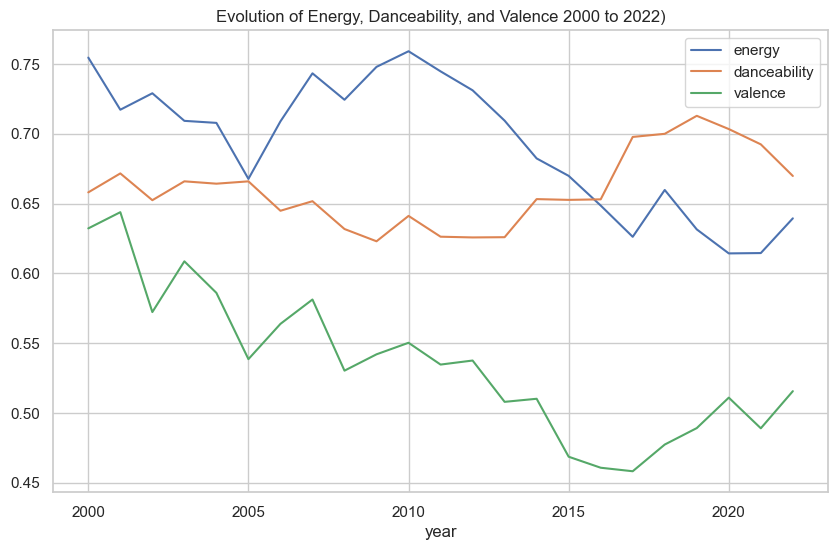

In [16]:
df.groupby('year')[['energy', 'danceability', 'valence']].mean().plot(figsize=(10,6)) # we have choosen those three features because : i) they re normalized meaning easy to compare / ii) they show how songs mood evolved over time / iii) and we can interpret them in human terme (energy=intensity /danceability =rythme / valence = positivity )
plt.title("Evolution of Energy, Danceability, and Valence 2000 to 2022)")
plt.show()

- energy shows a downward trend since 2015 that maybe shows that songs have been more intence
- danceability has increased over time suggesting thta modern songs are more rythmic 
- valence has decreased meaning that songs have been more melancoholic over time 